# Team Alpha Drone

---

Since the API from `api.dronestre.am` provides data on drone strikes in near real time, this might be useful to hold the President accountable if he/she promises to reduce drone strikes. 

**Your mission:** 
- Explore the drone strike data and describe it
- Do some accomanying research to augment your analysis
- Report back any good summary statistics

**Also, we would like to know:**
 - Is this a good source of data?
 - Why / why not?


One of the needs for data science in organizations is to bring measure to vague problems. What can be measured in this dataset with certainty? Drive your presentation from what can be measured, reported. 

Also, if possible, suggest what can be done with this data in terms of actionable outcomes and to what extent.
     
*Keep politics out of the presentation and group work. Let's keep the work and discussion to the data: what is measurable and insights we can draw.  This data isn't meant to prove or disprove anything. It's intended to be an interesting dataset to look at, not a platform for political discourse.*

In [10]:
# First we need to fetch some data using Python requests from API
# Read more about Python requests:
# http://docs.python-requests.org/en/master/user/quickstart/

import requests
import pandas as pd
import numpy as np
import re

response = requests.get("http://api.dronestre.am/data")
json_data = response.json()
drone_df = pd.DataFrame(json_data['strike'])

### Get the Head

In [11]:
#Nas
drone_df.head()

,_id,articles,bij_link,bij_summary_short,bureau_id,children,civilians,country,date,deaths,...,injuries,lat,location,lon,names,narrative,number,target,town,tweet_id
0,55c79e711cbee48856a30886,[],http://www.thebureauinvestigates.com/2012/03/2...,In the first known US targeted assassination u...,YEM001,,0,Yemen,2002-11-03T00:00:00.000Z,6,...,,15.47467,Marib Province,45.322755,"[Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hi...",In the first known US targeted assassination u...,1,,,278544689483890688
1,55c79e711cbee48856a30887,[],http://www.thebureauinvestigates.com/2011/08/1...,First known drone strike in Pakistan kills at ...,B1,2,2,Pakistan,2004-06-17T00:00:00.000Z,6-8,...,1,32.30512565,South Waziristan,69.57624435,"[Nek Mohammad, Fakhar Zaman, Azmat Khan, Marez...",The first known fatal US drone strike inside P...,2,Nek Mohammed,Wana,278544750867533824
2,55c79e711cbee48856a30888,[],http://www.thebureauinvestigates.com/2011/08/1...,"Two killed, including Haitham al-Yemeni an al ...",B2,,,Pakistan,2005-05-08T00:00:00.000Z,2,...,,32.98677989,North Waziristan,70.26082993,"[Haitham al-Yemeni, Samiullah Khan]",2 people killed in a Predator strike which rep...,3,Haitham al-Yemeni,Toorikhel,278544812255367168
3,55c79e721cbee48856a30889,[],http://www.thebureauinvestigates.com/2011/08/1...,"Failed strike against Abu Hamza Rabia (""al Qae...",B3,3,3-8,Pakistan,2005-11-05T00:00:00.000Z,8,...,1,32.99988191,North Waziristan,70.34082413,[],A failed strike destroyed Abu Hamza Rabia's ho...,4,Abu Hamza Rabia,Mosaki,278544854483628032
4,55c79e721cbee48856a3088a,[],http://www.thebureauinvestigates.com/2011/08/1...,"Syrian Abu Hamza Rabia, the senior al Qaeda op...",B4,2,2,Pakistan,2005-12-01T00:00:00.000Z,5,...,,33.00866349,North Waziristan,70.04196167,"[Abu Hamza Rabia, Suleiman al-Moghrabi, Amer A...","5 people were killed, including 2 children, wh...",5,Abu Hamza Rabia,Haisori,278544895789133825


### Drop unnecessary columns

In [12]:
drone_df.drop( ['bij_link','articles','bij_summary_short','bureau_id','names','target','town','tweet_id','number','narrative' ],axis=1, inplace = True, errors='ignore')

In [13]:
drone_df.columns

Index([u'_id', u'children', u'civilians', u'country', u'date', u'deaths',
       u'deaths_max', u'deaths_min', u'injuries', u'lat', u'location', u'lon'],
      dtype='object')

In [14]:
drone_df.head()

,_id,children,civilians,country,date,deaths,deaths_max,deaths_min,injuries,lat,location,lon
0,55c79e711cbee48856a30886,,0,Yemen,2002-11-03T00:00:00.000Z,6,6,6,,15.47467,Marib Province,45.322755
1,55c79e711cbee48856a30887,2,2,Pakistan,2004-06-17T00:00:00.000Z,6-8,8,6,1,32.30512565,South Waziristan,69.57624435
2,55c79e711cbee48856a30888,,,Pakistan,2005-05-08T00:00:00.000Z,2,2,2,,32.98677989,North Waziristan,70.26082993
3,55c79e721cbee48856a30889,3,3-8,Pakistan,2005-11-05T00:00:00.000Z,8,8,8,1,32.99988191,North Waziristan,70.34082413
4,55c79e721cbee48856a3088a,2,2,Pakistan,2005-12-01T00:00:00.000Z,5,5,5,,33.00866349,North Waziristan,70.04196167


### Identify these death columns for issues

In [15]:
drone_df['deaths_max'].unique()

array([u'6', u'8', u'2', u'5', u'22', u'83', u'4', u'34', u'10', u'0',
       u'15', u'13', u'20', u'1', u'12', u'25', u'7', u'23', u'3', u'21',
       u'9', u'11', u'16', u'35', u'31', u'14', u'40', u'17', u'18', u'27',
       u'32', u'42', u'26', u'', u'50', u'?', u'24', u'30', u'38', u'200',
       u'28', u'39'], dtype=object)

In [21]:
drone_df['deaths_min'].unique()

array([u'6', u'2', u'8', u'5', u'13', u'81', u'3', u'20', u'0', u'12',
       u'1', u'4', u'17', u'10', u'21', u'7', u'15', u'11', u'26', u'30',
       u'14', u'9', u'25', u'67', u'16', u'35', u'23', u'32', u'18', u'',
       u'?', u'24', u'29', u'38', u'150', u'28', u'39'], dtype=object)

In [22]:
drone_df['deaths'].unique()

array([u'6', u'6-8', u'2', u'8', u'5', u'13-22', u'81-83', u'3-4',
       u'20-34', u'5-10', u'Unknown', u'12-15', u'8-13', u'12-20', u'1',
       u'6-12', u'13-25', u'8-12', u'0', u'4-5', u'4-10', u'5-7', u'5-12',
       u'17-23', u'10-15', u'4-7', u'4-8', u'3', u'21', u'4-9', u'5-9',
       u'7-11', u'15-20', u'4-25', u'4-12', u'11-16', u'11-13', u'4-6',
       u'2-3', u'6-7', u'2-4', u'3-5', u'7-15', u'26-35', u'30-31',
       u'7-12', u'14-25', u'2-5', u'7-8', u'12-14', u'13', u'4', u'0-8',
       u'6-10', u'9-25', u'8-9', u'25-40', u'67-83', u'0-5', u'13-17',
       u'16-18', u'8-10', u'35-40', u'5-6', u'2-12', u'17-21', u'5-8',
       u'10-12', u'20-27', u'3-6', u'3-10', u'12-16', u'14-20', u'3-7',
       u'15-18', u'20', u'9-15', u'23-23', u'9', u'7', u'5-13', u'10-11',
       u'7-9', u'10', u'13-14', u'5-15', u'13-15', u'16-17', u'7-10',
       u'10-14', u'14', u'6-9', u'11-12', u'16', u'9-10', u'8-14',
       u'11-14', u'0-4', u'11-15', u'32', u'18-22', u'26-42', u'25-26',
   

### Inspect Children's column

In [ ]:
print drone_df['children'].unique
print drone_df['civilians'].unique()

### Get rid of the blanks and changing it to 0

### make a loop to clean

In [47]:
cleancolumns = ['children','civilians','lat','lon','deaths_min','deaths_max']

for column in cleancolumns:
    newnumber =[]
    blankmask = drone_df[column] == ""
    drone_df.loc[blankmask,column] =0
    for string in drone_df[column]:
        try:
            newnumber.append(float(string))
        except ValueError:
            if string =="Possibly" or string == "Yes" or "according" in string  or string =="Yes " or "mar" in string or "yes" in string or "Yes" in string:
                newnumber.append(1)
            elif "At least" in string:
                newnumber.append(string[len("At least ")+1:])

            else:
                newnumber.append(0)
    drone_df[column]=newnumber
        


### 'Deaths' has a lot of ambiguous values, we shall take deaths to be the mid point between max and min. Then drop both of them.

In [50]:
death = ( pd.to_numeric(drone_df['deaths_max'],errors='ignore') + pd.to_numeric(drone_df['deaths_min'],errors='ignore') ) 
death /= 2


In [51]:
drone_df['deaths'] = death
drone_df.drop( ['deaths_max','deaths_min' ],axis=1, inplace = True, errors='ignore')

### Check the labels

In [52]:
drone_df.head()

,_id,children,civilians,country,date,deaths,injuries,lat,location,lon
0,55c79e711cbee48856a30886,0,0,Yemen,2002-11-03T00:00:00.000Z,6.0,,15.474670,Marib Province,45.322755
1,55c79e711cbee48856a30887,2,2,Pakistan,2004-06-17T00:00:00.000Z,7.0,1,32.305126,South Waziristan,69.576244
2,55c79e711cbee48856a30888,0,0,Pakistan,2005-05-08T00:00:00.000Z,2.0,,32.986780,North Waziristan,70.260830
3,55c79e721cbee48856a30889,3,0,Pakistan,2005-11-05T00:00:00.000Z,8.0,1,32.999882,North Waziristan,70.340824
4,55c79e721cbee48856a3088a,2,2,Pakistan,2005-12-01T00:00:00.000Z,5.0,,33.008663,North Waziristan,70.041962


### Get the Shape

In [54]:
drone_df.shape

(647, 10)

In [55]:
drone_df.head(5)

,_id,children,civilians,country,date,deaths,injuries,lat,location,lon
0,55c79e711cbee48856a30886,0,0,Yemen,2002-11-03T00:00:00.000Z,6.0,,15.474670,Marib Province,45.322755
1,55c79e711cbee48856a30887,2,2,Pakistan,2004-06-17T00:00:00.000Z,7.0,1,32.305126,South Waziristan,69.576244
2,55c79e711cbee48856a30888,0,0,Pakistan,2005-05-08T00:00:00.000Z,2.0,,32.986780,North Waziristan,70.260830
3,55c79e721cbee48856a30889,3,0,Pakistan,2005-11-05T00:00:00.000Z,8.0,1,32.999882,North Waziristan,70.340824
4,55c79e721cbee48856a3088a,2,2,Pakistan,2005-12-01T00:00:00.000Z,5.0,,33.008663,North Waziristan,70.041962


### Change the number columns to numerical

In [58]:
columnstonumeric = ['children','deaths','civilians','lat','lon']

for i in columnstonumeric:
    pd.to_numeric(drone_df[i])

### Get the Info and Describe

In [62]:
drone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 10 columns):
_id          647 non-null object
children     647 non-null object
civilians    647 non-null object
country      647 non-null object
date         647 non-null object
deaths       647 non-null float64
injuries     647 non-null object
lat          647 non-null float64
location     647 non-null object
lon          647 non-null float64
dtypes: float64(3), object(7)
memory usage: 50.6+ KB


### Check the datatype

In [63]:
drone_df.dtypes

_id           object
children      object
civilians     object
country       object
date          object
deaths       float64
injuries      object
lat          float64
location      object
lon          float64
dtype: object

In [ ]:
#James

In [ ]:
drone_df.describe

### Fix the Dates via truncation, see year by year

In [117]:
drone_df['date'] = drone_df['date'].map(lambda x: x[:4])
pd.to_numeric(drone_df['date'])

0      2002
1      2004
2      2005
3      2005
4      2005
5      2006
6      2006
7      2006
8      2007
9      2007
10     2007
11     2007
12     2007
13     2008
14     2008
15     2008
16     2008
17     2008
18     2008
19     2008
20     2008
21     2008
22     2008
23     2008
24     2008
25     2008
26     2008
27     2008
28     2008
29     2008
       ... 
617    2016
618    2016
619    2016
620    2016
621    2016
622    2016
623    2016
624    2016
625    2016
626    2016
627    2016
628    2016
629    2016
630    2016
631    2016
632    2016
633    2016
634    2016
635    2016
636    2016
637    2016
638    2016
639    2016
640    2017
641    2017
642    2017
643    2017
644    2017
645    2017
646    2017
Name: date, Length: 647, dtype: int64

### The final cleaned result

In [108]:
drone_df.head(10)

,_id,children,civilians,country,date,deaths,injuries,lat,location,lon
0,55c79e711cbee48856a30886,0,0,Yemen,2002,6.0,,15.474670,Marib Province,45.322755
1,55c79e711cbee48856a30887,2,2,Pakistan,2004,7.0,1,32.305126,South Waziristan,69.576244
2,55c79e711cbee48856a30888,0,0,Pakistan,2005,2.0,,32.986780,North Waziristan,70.260830
3,55c79e721cbee48856a30889,3,0,Pakistan,2005,8.0,1,32.999882,North Waziristan,70.340824
4,55c79e721cbee48856a3088a,2,2,Pakistan,2005,5.0,,33.008663,North Waziristan,70.041962
5,55c79e721cbee48856a3088b,1,0,Pakistan,2006,8.0,9,33.094993,North Waziristan,70.059128
6,55c79e721cbee48856a3088c,5,0,Pakistan,2006,17.5,,34.815495,Bajaur Agency,71.496964
7,55c79e721cbee48856a3088d,69,0,Pakistan,2006,82.0,3,34.836350,Bajaur Agency,71.492157
8,55c79e721cbee48856a3088e,0,8,Pakistan,2007,8.0,,32.835751,South Waziristan,69.555817
9,55c79e721cbee48856a3088f,0,4,Pakistan,2007,3.5,9,33.094993,North Waziristan,70.059128


#  visualiztion to plot the graphs

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

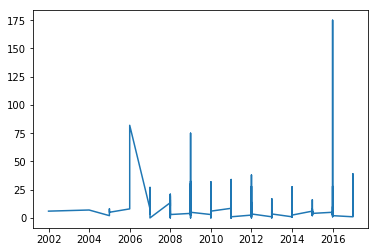

In [121]:
plt.plot(drone_df['date'],drone_df['deaths'])

### Proportion of deaths by country

In [152]:
 drone_df['country'].unique()

array([u'Yemen', u'Pakistan', u'Somalia', u'Pakistan-Afghanistan Border'], dtype=object)

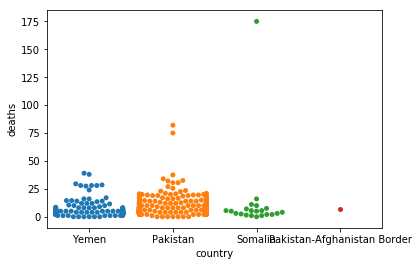

In [156]:
sns.swarmplot (drone_df['country'] , drone_df['deaths'])

### Proportion of deaths by year

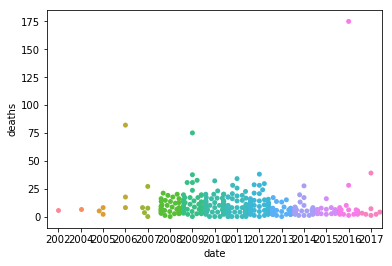

In [249]:
sns.swarmplot (drone_df['date'] , drone_df['deaths'])


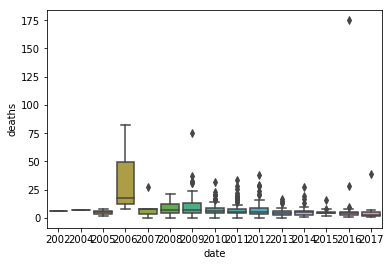

In [253]:
sns.boxplot (drone_df['date'] , drone_df['deaths'])


### What about the general trend of bombings?

In [234]:
years = [int(x) for x in drone_df['date'].value_counts().keys()]
amount = [int(x) for x in drone_df['date'].value_counts()]



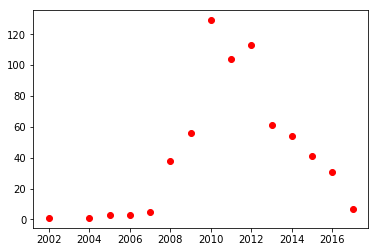

In [241]:
plt.scatter(years,amount,color='r')